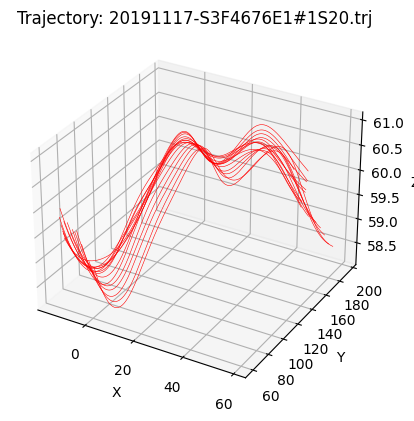

In [1]:
# Import other necessary modules here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Define the read_trj_data function here
from trj_data_utils import read_trj_data

# Set the filename
filename = "20191117-S3F4676E1#1S20.trj"

# Read the trajectory data
data = read_trj_data(filename)

# Create the 3D plot
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-60)

# Plot the trajectories
for trj in data:
    if len(trj) < 10:
        continue
    X = []
    Y = []
    Z = []
    for x in trj:
        X.append(x[2])
        Y.append(x[3])
        Z.append(x[4])
    ax.plot3D(X, Y, Z, 'red', linewidth=0.4)

# Set the plot title and labels
ax.set_title('Trajectory: ' + filename)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.grid(True)
plt.show()


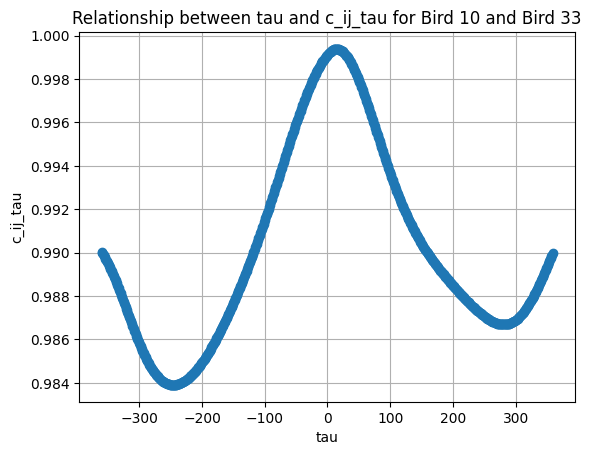

In [2]:
from correlation_delay import calculate_correlation_pairs_multiple_tau, calculate_directional_correlation_delay

bird_i = 10  # Index of bird i
bird_j = 33  # Index of bird j
tau_values = list(range(-60*6, 60*6, 1))  # List of tau values from -60*6 to 60*6 with interval of 10

# calculate_directional_correlation_delay(data, bird_i, bird_j, 0)

c_ij_values = calculate_correlation_pairs_multiple_tau(data, bird_i, bird_j, tau_values)[bird_i, bird_j]

plt.plot(tau_values, c_ij_values, marker='o')
plt.xlabel('tau')
plt.ylabel('c_ij_tau')
plt.title(f'Relationship between tau and c_ij_tau for Bird {bird_i} and Bird {bird_j}')
plt.grid(True)
plt.show()


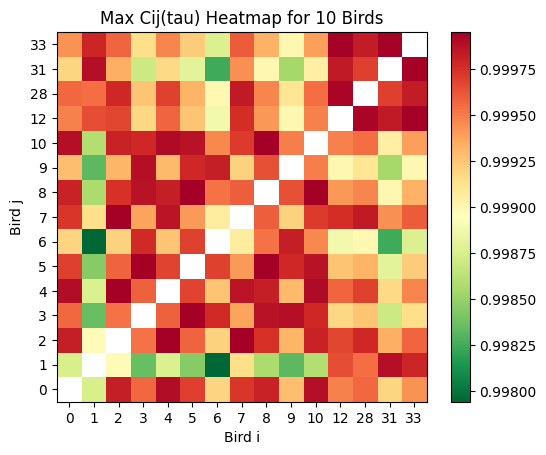

In [3]:
import numpy as np
from trj_data_utils import calculate_heatmap_data, find_trajectory_ids

num_birds = 10  # Number of birds
bird_ids = find_trajectory_ids(data, 180)
tau_values = list(range(-60 * 2, 60 * 2, 1))  # List of tau values from -60*2 to 60*2 with interval of 1

# Create a 2D numpy array to store the maximum Cij(tau) values and corresponding tau values
heatmap_data, tau_max_data = calculate_heatmap_data(data, bird_ids, tau_values)

# Set the diagonal elements to NaN to exclude them from colormap
np.fill_diagonal(heatmap_data, np.nan)

# Define the minimum and maximum values of the heatmap excluding NaN values
vmin = np.nanmin(heatmap_data)
vmax = np.nanmax(heatmap_data)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap using the 'imshow' function and specify colormap and normalization range
heatmap = ax.imshow(heatmap_data[::-1, :], cmap='RdYlGn_r', vmin=vmin, vmax=vmax)

# Add a colorbar to the heatmap
cbar = plt.colorbar(heatmap)

# Set the x-axis and y-axis labels
ax.set_xticks(np.arange(len(bird_ids)))
ax.set_yticks(np.arange(len(bird_ids)))
ax.set_xticklabels(bird_ids)
ax.set_yticklabels(bird_ids[::-1])  # Reverse the y-axis labels
plt.xlabel('Bird i')
plt.ylabel('Bird j')

# Set the title of the plot
plt.title(f'Max Cij(tau) Heatmap for {num_birds} Birds')

# Display the plot
plt.show()

In [4]:
from trj_data_utils import create_tau_relations_matrix, find_related_most

# Print the tau value at which Cij(tau) is maximum for each pair of birds
for i, bird_i in enumerate(bird_ids):
    for j, bird_j in enumerate(bird_ids[i + 1:], start=i + 1):
        max_tau = tau_max_data[i, j]
        print(f"Max tau for Bird {bird_i} and Bird {bird_j}: {max_tau}")
        
tau_relations = create_tau_relations_matrix(heatmap_data, tau_max_data, bird_ids)
# print(tau_relations)
max_each_tau = find_related_most(tau_relations, bird_ids)
print(max_each_tau)

Max tau for Bird 0 and Bird 1: 34.0
Max tau for Bird 0 and Bird 2: 7.0
Max tau for Bird 0 and Bird 3: 34.0
Max tau for Bird 0 and Bird 4: 6.0
Max tau for Bird 0 and Bird 5: 27.0
Max tau for Bird 0 and Bird 6: 46.0
Max tau for Bird 0 and Bird 7: 14.0
Max tau for Bird 0 and Bird 8: 19.0
Max tau for Bird 0 and Bird 9: 42.0
Max tau for Bird 0 and Bird 10: 11.0
Max tau for Bird 0 and Bird 12: 24.0
Max tau for Bird 0 and Bird 28: 20.0
Max tau for Bird 0 and Bird 31: 30.0
Max tau for Bird 0 and Bird 33: 21.0
Max tau for Bird 1 and Bird 2: -34.0
Max tau for Bird 1 and Bird 3: -9.0
Max tau for Bird 1 and Bird 4: -34.0
Max tau for Bird 1 and Bird 5: -14.0
Max tau for Bird 1 and Bird 6: 2.0
Max tau for Bird 1 and Bird 7: -27.0
Max tau for Bird 1 and Bird 8: -21.0
Max tau for Bird 1 and Bird 9: -1.0
Max tau for Bird 1 and Bird 10: -28.0
Max tau for Bird 1 and Bird 12: -15.0
Max tau for Bird 1 and Bird 28: -20.0
Max tau for Bird 1 and Bird 31: -6.0
Max tau for Bird 1 and Bird 33: -11.0
Max tau for 

![Bird Image](./flock_tau_1.png)

# Bird Relationships

The relationships among the birds are as follows:

## Bird 1
- Strong Relationship (SR) with Bird 3 and Bird 5.
- Normal Relationship (NR) with Bird 9.
- Weak Relationships (WR) with Bird 4, Bird 6, and Bird 8.

## Bird 2
- Not related to any other bird.

## Bird 3
- Strong Relationship (SR) with Bird 8.
- Weak Relationship (WR) with Bird 9.

## Bird 4
- Normal Relationship (NR) with Bird 10.
- Weak Relationships (WR) and Bird 7.

## Bird 5
- Strong Relationship (SR) with Bird 3.
- Normal Relationship (NR) with Bird 8.
- Weak Relationship (WR) with Bird 4 and Bird 9.

## Bird 6
- Strong Relationship (SR) with Bird 4.
- Weak Relationships (WR) with Bird 7 and Bird 10.

## Bird 7
- Not related to any other bird.

## Bird 8
- Weak Relationship (WR) with Bird 9.

## Bird 9
- Strong Relationship (SR) with Bird 6.
- Normal Relationship (NR) with Bird 4.
- Weak Relationship (WR) with Bird 10.

## Bird 10
- Normal Relationship (NR) with Bird 7.

![Bird Image](./flock_image.png)


In [ ]:
from correlation_delay import get_traj, get_trajs_by_ids

frame_number = 200
# Select the top num_birds trajectories based on trj_id
selected_trajectories = get_trajs_by_ids(data, bird_ids)

positions = np.array([[pos[2], pos[3], pos[4]] for traj in selected_trajectories for i, pos in enumerate(traj) if i == frame_number])

bird_labels = [f'B{bird_id}' for bird_id in bird_ids]

x = positions[:, 0]
y = positions[:, 1]
z = positions[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
for i, label in enumerate(bird_labels):
    ax.text(x[i], y[i], z[i], label, 'x', ha='center', va='center')

ax.view_init(elev=1000, azim=90)  # Change the angles as per your requirement

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title(f'Bird Positions at Frame {frame_number}')
plt.show()

In [ ]:
# Fit a plane to the positions using least-squares method
A = np.column_stack((x, y, np.ones_like(x)))
b = z
plane_params, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

xx, yy = np.meshgrid(np.linspace(min(x), max(x), 10), np.linspace(min(y), max(y), 10))
zz = plane_params[0] * xx + plane_params[1] * yy + plane_params[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
for i, label in enumerate(bird_labels):
    ax.text(x[i], y[i], z[i], label, 'x', ha='center', va='center')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title(f'Bird Positions at Frame {frame_number}')

ax.plot_surface(xx, yy, zz, alpha=0.2)

# Set the camera view to be vertical to the plane
ax.view_init(elev=90, azim=90)  # Adjust the elev and azim angles as needed

plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.html'] = 'jshtml'

birds_positions = {}
for bird_index, traj in enumerate(selected_trajectories):
    birds_positions[bird_index] = np.array([[pos[2], pos[3], pos[4]] for pos in traj])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

point_plots = []
for bird_index, positions in birds_positions.items():
    point_plot, = ax.plot([], [], [], 'o')  # Adjust the marker style here
    point_plot.set_markersize(1)  # Set the size to 1 (adjust as desired)
    point_plots.append(point_plot)

text_labels = []
for i, label in enumerate(bird_labels):
    text_label = ax.text(0, 0, 0, label, 'x', ha='center', va='center', rotation=90, fontsize=6)  # Adjust the fontsize here
    text_labels.append(text_label)

# ax.dist = 500  # Adjust the distance to zoom in (smaller value for closer zoom)
ax.view_init(elev=90, azim=90) 

def init():
    max_xyz = 0
    min_xyz = 99999
    for positions in birds_positions.values():
        max_xyz = max(max_xyz, np.max(positions))
        min_xyz = min(min_xyz, np.min(positions))
    max_xyz = 50
    min_xyz = 150
    ax.set_xlim(min_xyz, max_xyz)
    ax.set_ylim(min_xyz, max_xyz)
    ax.set_zlim(min_xyz, max_xyz)
    return point_plots + text_labels

def update(frame):
    for i, (bird_index, positions) in enumerate(birds_positions.items()):
        x = positions[frame][0]
        y = positions[frame][1]
        z = positions[frame][2]

        point_plots[i].set_data([x], [y])
        point_plots[i].set_3d_properties([z])

        text_labels[i].set_position((x, y))
        text_labels[i].set_z(z)

    ax.set_xlim(x - 5, x + 25)
    ax.set_ylim(y - 15, y + 16)
    ax.set_zlim(z - 10, z + 10)
    return point_plots + text_labels

num_frames = 600
interval = 1000 / 60

ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, interval=interval, blit=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Animated Bird Positions')

plt.close(ani._fig)

# Use ffmpeg
# ani.save('birds_all.mp4')

ani

In [ ]:
from trj_data_utils import calculate_acceleration
from matplotlib import colormaps
acceleration_data = calculate_acceleration(selected_trajectories)
colormap = colormaps.get_cmap('tab20')

for i, trajectory in enumerate(acceleration_data):
    trj_id = trajectory[0][0]
    frames = [frame[1] for frame in trajectory]
    xaccs = [frame[2] for frame in trajectory]
    color = colormap(i % 20)
    plt.plot(frames, xaccs, color=color, label=f"trj_id: {trj_id} - X Acceleration")

plt.xlabel('Frame')
plt.ylabel('Acceleration')
plt.title('Acceleration X Changes with Frame')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for i, trajectory in enumerate(acceleration_data):
    trj_id = trajectory[0][0]
    frames = [frame[1] for frame in trajectory]
    yaccs = [frame[3] for frame in trajectory]
    color = colormap(i % 20)
    plt.plot(frames, yaccs, color=color, label=f"trj_id: {trj_id} - Y Acceleration")

plt.xlabel('Frame')
plt.ylabel('Acceleration')
plt.title('Acceleration Y Changes with Frame')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for i, trajectory in enumerate(acceleration_data):
    trj_id = trajectory[0][0]
    frames = [frame[1] for frame in trajectory]
    zaccs = [frame[4] for frame in trajectory]
    color = colormap(i % 20)
    plt.plot(frames, zaccs, color=color, label=f"trj_id: {trj_id} - Z Acceleration")

plt.xlabel('Frame')
plt.ylabel('Acceleration')
plt.title('Acceleration Z Changes with Frame')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i, trajectory in enumerate(acceleration_data):
    trj_id = trajectory[0][0]
    frames = [frame[1] for frame in trajectory]
    xaccs = [frame[2] for frame in trajectory]
    yaccs = [frame[3] for frame in trajectory]
    zaccs = [frame[4] for frame in trajectory]

    # Calculate combined acceleration
    combined_accs = [((xacc ** 2) + (yacc ** 2) + (zacc ** 2)) ** 0.5 for xacc, yacc, zacc in zip(xaccs, yaccs, zaccs)]

    # Normalize combined acceleration
    combined_accs_normalized = scaler.fit_transform([[acc] for acc in combined_accs])

    color = colormap(i % 20)

    plt.plot(frames, combined_accs_normalized, color=color, label=f"trj_id: {trj_id} - Combined Acceleration")

plt.xlabel('Frame')
plt.ylabel('Normalized Combined Acceleration')
plt.title('Normalized Combined Acceleration Changes with Frame')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()